Opening CLC2018

In [1]:
import rasterio
from rasterio.plot import show
import pathlib
import numpy as np

# TODO
1. ~~Reproject the clc to 60m. Apparently it needs to have exactly 60m to work.~~ **DONE**
2. ~~Try to run the code a few blocks below after the first task. If not then fix it so that it extracts~~
~~what is needed. Currently I can extract a patch from clc with a patch extent, but the pixel values of clc.~~ **DONE**
3. If successful, work on making it iterate with the other code
4. Then the only iteration left will be to read different satellite images
5. Then, a date limit should be added as well as a temporal criterion.

## Opening zipped images with rasterio

In [75]:
zipped_image = pathlib.Path("zip+file:" + r'C:\Users\Kostas\Desktop\testtiff.zip!\f1\20170420T103021_B01_60m_Patch_2.tiff')

normal_image = pathlib.Path(r'C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725\pep725_outputs\pep725_high_count_days\rasters\20170420T103021_B01_60m_Patch_6.tiff')


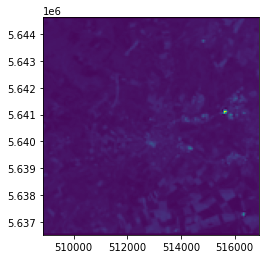

In [3]:
with rasterio.open(zipped_image) as src:
    show(src)

## Clipping the CLC to the total extent of the buffer file to reduce its size

Loading the buffers gdf and using its extent

In [4]:
import geopandas as gpd
buffers_path = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725\pep725_outputs\PEP725_buffers.geojson"
buffers_WGS84_path = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725\pep725_outputs\PEP725_buffers_WGS84.geojson"
buffers = gpd.read_file(buffers_path, driver="GeoJSON")
buffers_WGS84 = gpd.read_file(buffers_WGS84_path, driver='GeoJSON')

In [11]:
# Setting its actual crs and then transforming it to the same one as the CLC
buffers.set_crs(32632, inplace=True, allow_override=True)
#buffers.to_crs("EPSG:3035", inplace=True)

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
0,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,"POLYGON ((8057732.408 1173601.156, 8057727.927..."
1,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,"POLYGON ((7717949.185 891530.628, 7717944.898 ..."
2,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,"POLYGON ((7792824.331 691331.640, 7792822.757 ..."
3,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,"POLYGON ((7785182.332 733410.128, 7785180.253 ..."
4,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,"POLYGON ((7736375.695 890595.097, 7736371.580 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129324,5456,13.75000,50.7333,875,864,10000,perm_grass,None,131,2021,244,2021-09-01,M,"POLYGON ((8080884.799 861078.289, 8080884.208 ..."
129325,961,7.50000,52.7667,30,33,10000,perm_grass,None,111,2021,257,2021-09-14,M,"POLYGON ((7715644.213 991464.178, 7715638.925 ..."
129326,20595,8.50000,49.4667,95,86,10000,perm_grass,None,131,2021,258,2021-09-15,M,"POLYGON ((7782012.374 681630.789, 7782010.790 ..."
129327,19312,8.36667,48.6000,490,622,10000,perm_grass,None,131,2021,285,2021-10-12,M,"POLYGON ((7776910.095 597540.914, 7776909.312 ..."


In [7]:
extent = buffers_WGS84['geometry'].total_bounds

In [8]:
print(extent)

[ 5.95876461 47.36401639 15.09050189 54.86924656]


## Caution: Opening the CLC with rasterio.show() here will freeze the PC. Open it through CRIB

In [3]:
#clc_path = 'zip+file:' + r'C:\Users\Kostas\Desktop\GIMA\Module_7\Data\CLC2018\u2018_clc2018_v2020_20u1_raster100m.zip!\u2018_clc2018_v2020_20u1_raster100m\DATA\U2018_CLC2018_V2020_20u1.tif'
# Open the resampled CLC
clc_path = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\CLC2018\CLC2018_GER_WGS84UTM32N_60m_ArcPro.tif"
clc_path = pathlib.Path(clc_path)

In [46]:
with rasterio.open(normal_image) as src:
    print("Number of Bands:", src.count, '\n')
    print("\nCRS:", src.crs)
    print("Spatial resolution:", src.res)
    print(f'Dimensions:\n\tWidth: {src.width}\n\tHeight: {src.height}')
    print(f'Full shape: {src.shape}')
    print('This is a tuple with the coords, so it can be used later:', src.bounds)


src.close

Number of Bands: 1 


CRS: EPSG:32632
Spatial resolution: (60.0, 60.0)
Dimensions:
	Width: 134
	Height: 135
Full shape: (135, 134)
This is a tuple with the coords, so it can be used later: BoundingBox(left=567000.0, bottom=5670360.0, right=575040.0, top=5678460.0)


<function DatasetReader.close>

The CLC classes that correspond to the vegetation groups
1. DBL: 141, 311, 313, 324
2. EC: 312
3. M: 231, 321

In the CLC raster they pixel values do not correspond to the CLC class values. The corresponding pixel values and vegetation groups are shown in the table below

| CLC class | pixel value | Vegetation group (Label) |
| :--------:| :---------: | :----------------------: |
| 141       | 10          |DBL                       |
| 311       | 23          |DBL                       |
| 313       | 25          |DBL                       |
| 324       | 29          |DBL                       |
| 312       | 24          |EC                        |
| 231       | 18          |M                         |
| 321       | 26          |M                         |





In [18]:
clc_pixel_values = [10, 23, 25, 29, 24, 18, 26]

Finally working 

1. Reads `patch`
2. Reads `clc` and creates a mask that limits the extent of `clc` to the extent the `patch`. Here it is important to enable padding and make its with -0.5**. This results in a numpy array called `clcdata`
3. A numpy mask is applied on the values of `clcdata`. This boolean mask receives a list of clc pixel values and sets every pixels value that is outside the list to no data.
4. The no data values of the mask are then set to 0 (integer) as they were considered as 'NoneType' and were not accepted.
5. `patchdata` values are replaced with the numpy mask values.
6. A new raster is created with the `patchdata` values and the profile of `patch`



**For some unknown reason padding is added by default, whereas in rasterio's documentation it is stated that it is not added by default. Some tests that I did with this showed that the resulting clc.shape had 1 more row and column (or 1px height and width):

`clc.shape`: (1, 136, 135), `patch.shape`: (1, 135, 134)    
`clc.shape`: (1, 135, 136), `patch.shape`: (1, 134, 135)




In [80]:
# Its working!!!!

from shapely.geometry import box
from rasterio.mask import mask
import numpy as np

output_path = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches\test4.tif"

with rasterio.open(normal_image) as patch:
    patchdata = patch.read()
    profile = patch.profile.copy()

with rasterio.open(clc_path) as clc:
# get the bounds of the normal image
    clcdata, clc_transform = mask(clc, [box(*patch.bounds)], crop=True, pad=True, pad_width=-0.5)

print('\n',clcdata.shape, patchdata.shape)
# create bool array where clc is not in list of values
value_mask = np.isin(clcdata, clc_pixel_values, invert=True)

# set everything in patch where mask is True to NoData
# so we only retain patch values where clc is in the list
if profile["nodata"] is None:
    profile["nodata"] = 0
patchdata[value_mask] = profile["nodata"]
with rasterio.open(output_path, "w", **profile) as output:
    output.write(patchdata)


 (1, 135, 134) (1, 135, 134)


In [101]:
print(f'Number of bands: {raster.count}')
print(f"Indexes of the bands: {raster.indexes}\t <-- In this case it's a single band\n")
print('The indexes can be used to print the numpy.ndarray for the selected band')
#print(raster.read(1))
print('\n')
print(f'Dimensions:\n\tWidth:{raster.width}\n\tHeight: {raster.height}')
print('Extent:', raster.bounds)
print('----------------------------------')
print(f'Transformation:{raster.transform}')
print('----------------------------------')


Number of bands: 1
Indexes of the bands: (1,)	 <-- In this case it's a single band

The indexes can be used to print the numpy.ndarray for the selected band


Dimensions:
	Width:65000
	Height: 46000
Extent: BoundingBox(left=900000.0, bottom=900000.0, right=7400000.0, top=5500000.0)
----------------------------------
Transformation:| 100.00, 0.00, 900000.00|
| 0.00,-100.00, 5500000.00|
| 0.00, 0.00, 1.00|
----------------------------------


In [92]:
clc.read(1)

In [94]:
# Values from the array can be addressed by their row, column index.
band1[raster.height // 2, raster.width // 2]

12